<a id = "data"></a>
# Data
The data contains 2,205 observations and 39 columns. The dataset description on the card does not match the actual columns in the dataset. The below list contains actual columns from the dataset and the assumed descriptions from the column's names. 

| Feature | Description | Comment |
|---------|-------------|---------|
| **AcceptedCmp1** | 1 if customer accepted the offer in the 1st campaign, 0 otherwise | |
| **AcceptedCmp2** | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise | |
| **AcceptedCmp3** | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise | |
| **AcceptedCmp4** | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  | |
| **AcceptedCmp5** | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  | |
| **AcceptedCmpOverall** | overall number of accepted campaigns |This column was added from the list of actual columns|
| **Response** | 1 if customer accepted the offer in the last campaign, 0 otherwise  | |
| **Complain** | 1 if customer complained in the last 2 years  | |
| **DtCustomer** | date of customer’s enrolment with the company |There is no such column in the dataset|
| **Customer_Days** | number of days since registration as a customer | |
| **Education** | customer’s level of education |There is no such column in the actual dataset|
| **education_2n Cycle** | customer has secondary education | This column was added from the list of actual columns|
| **education_Basic** | customer has basic education | This column was added from the list of actual columns|
| **education_Graduation** |Customer has a bachelor degree | This column was added from the list of actual columns|
| **education_Master** | Customer has a masters degree|This column was added from the list of actual columns|
| **education_PhD** | Customer has a PhD | This column was added from the list of actual columns |
| **Marital** | customer’s marital status. |There is no such column in the actual dataset |
| **marital_Divorced** | 1 if customer is divorced, 0 otherwise. | This column was added from the list of actual columns|
| **marital_Married** | 1 if customer is married, 0 otherwise.| This column was added from the list of actual columns|
| **marital_Single** | 1 if customer is single, 0 otherwise. |This column was added from the list of actual columns|
| **marital_Together** | 1 if customer is in relationship, 0 otherwise.| This column was added from the list of actual columns|
| **marital_Widow** | 1 if customer is a widow / widower, 0 otherwise  | |
| **Kidhome** | number of small children in customer’s household | |
| **Teenhome** | number of teenagers in customer’s household | |
| **Income** | customer’s yearly household income | |
| **MntFishProducts** | amount spent on fish products in the last 2 years | |
| **MntMeatProducts** | amount spent on meat products in the last 2 years | |
| **MntFruits** | amount spent on fruits products in the last 2 years | |
| **MntSweetProducts** | amount spent on sweet products in the last 2 years | |
| **MntWines** | amount spent on wine products in the last 2 years | |
| **MntGoldProds** | amount spent on gold products in the last 2 years | |
| **NumDealsPurchases** | number of purchases made with discount | |
| **NumCatalogPurchases** | number of purchases made using catalogue | |
| **NumStorePurchases** | number of purchases made directly in stores | |
| **NumWebPurchases** | number of purchases made through company’s web site | |
| **NumWebVisitsMonth** | number of visits to company’s web site in the last month | |
| **Recency** | number of days since the last purchase | |
| **Z_CostContact** | | This column was added from the list of actual columns|
| **Z_Revenue** | | This column was added from the list of actual columns|
| **Age** | Age of customer|  This column was added from the list of actual columns|
| **MntTotal** | Total amount spent on all the products| This column was added from the list of actual columns |
| **MntRegularProds** | | This column was added from the list of actual columns|


# Customer Segmentation Analysis

### Importing libraries

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [6]:
df = pd.read_csv('ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [8]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### Looking for missing values

In [9]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

There is no missing value.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [11]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal      

There is no need for column Z_CostContact and Z_Revenue as they have only one single type of value.

In [10]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

## Box plot for the total amount spent on all products (MntTotal)


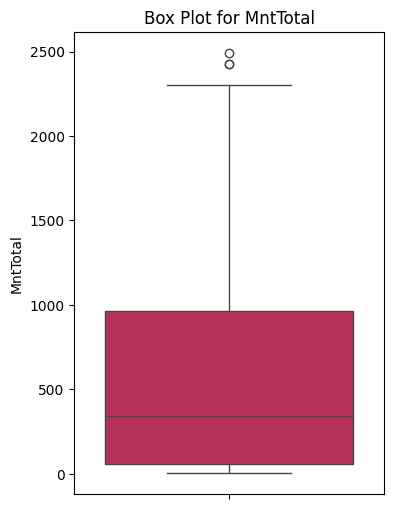

In [56]:
plt.figure(figsize=(4, 6))  
sns.boxplot(data=df, y='MntTotal', palette='rocket')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

## Outliers
The box plot spotted a few outliers in the MntTotal. Let's take a closer look at the outliers. 

In [9]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


### Outliers removal

In [10]:
data = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


## Box plot and histogram for income

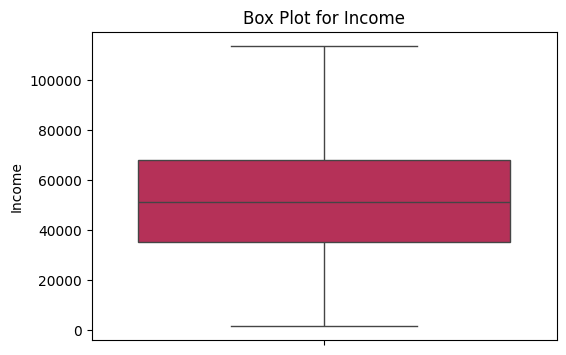

In [47]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=df, y='Income', palette='rocket')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

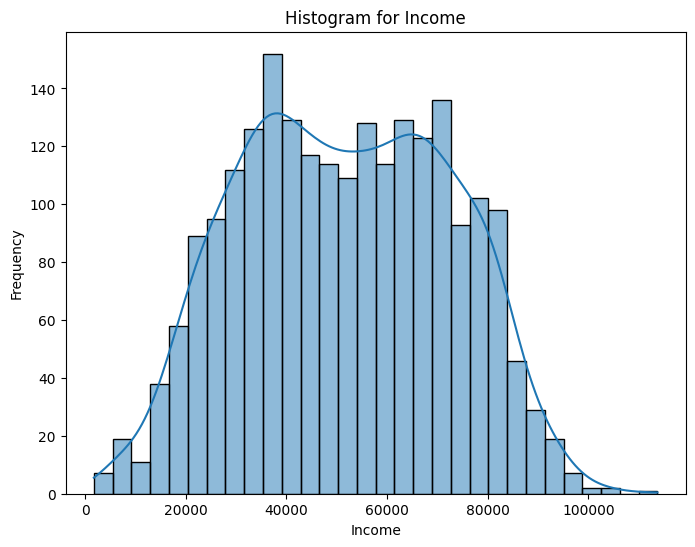

In [55]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Income distribution is close to normal distribution with no outliers.

## Histogram for age

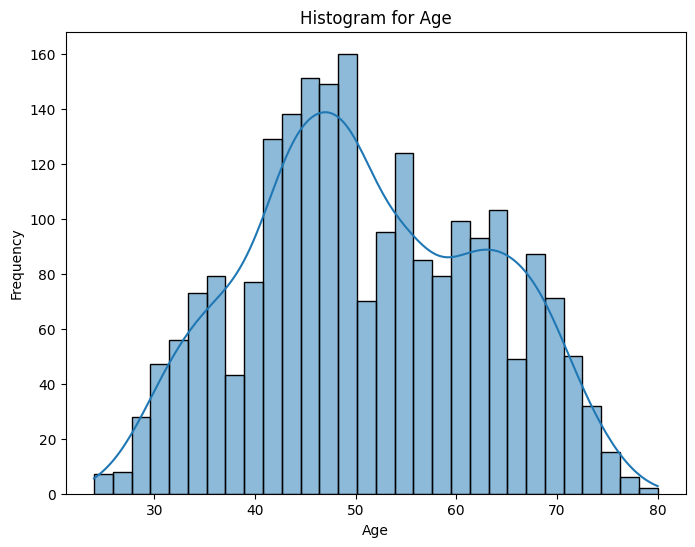

In [13]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
print("Skewness: %f" % df['Age'].skew())
print("Kurtosis: %f" % df['Age'].kurt())

Skewness: 0.089941
Kurtosis: -0.797036


The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. Skewness of 0.09 (close to zero) supports the visual observation of the distribution.
Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution. 

## Correlation matrix



In [16]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

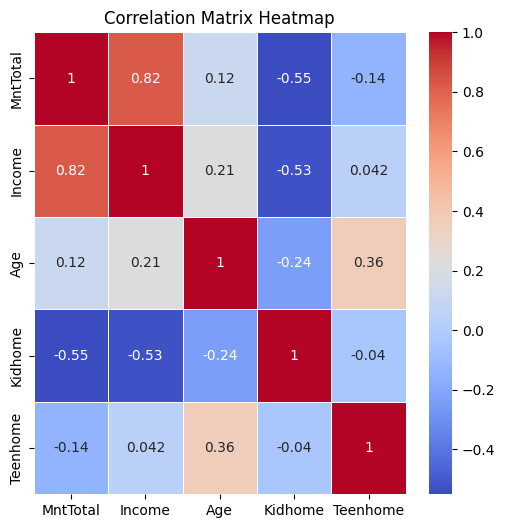

In [18]:
corr_matrix = df[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome. Income feature has nearly the same negative correlation with Kidhome and MntTotal.

## New feature: Marital
The data frame contains 5 columns to reflect marital status. We are going to create a new column 'marital' with values: Divorced, Married, Single, Together, Widow. This column will allow us to draw some additional plots. 

In [19]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)


Text(0, 0.5, 'MntTotal')

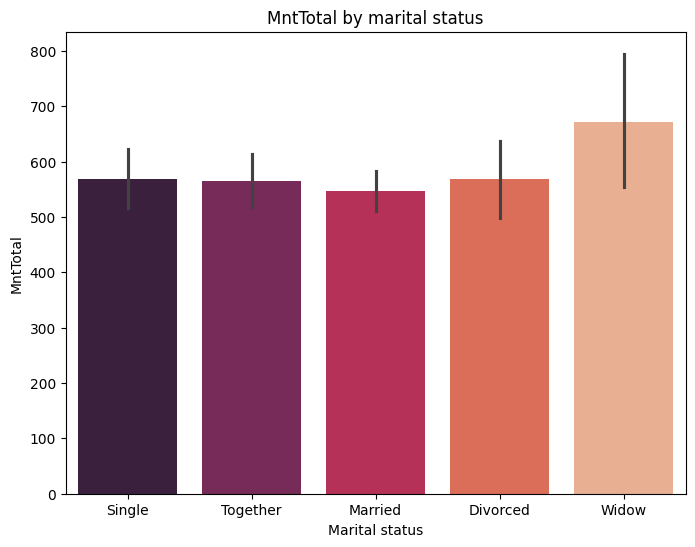

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='rocket')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

## New feature: In_relationship
There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a person is in relationship (Together, Married). We will add an additional feature 'In_relationship'. This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [21]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()    


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


# K-Means Clustering

## Standardising data


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


The mean value for all colums is almost zero and the standard deviation is almost 1. All the data points were replaced by their z-scores.

## Principal Component Analysis (PCA)


In [27]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

## Elbow method


In [28]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

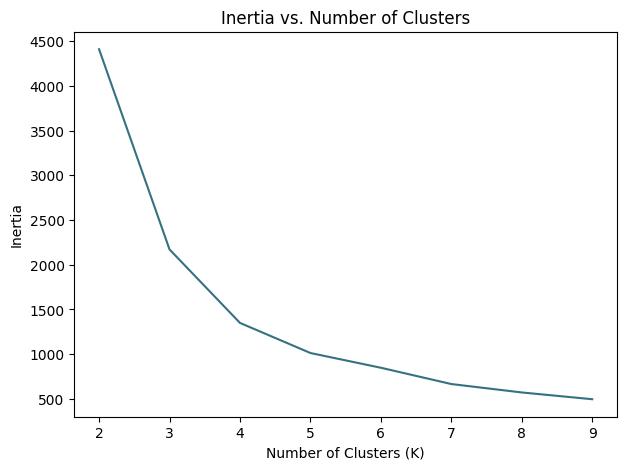

In [29]:

plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 4 or 5 clusters. Let's check silhouette score.

## Silhouette score analysis


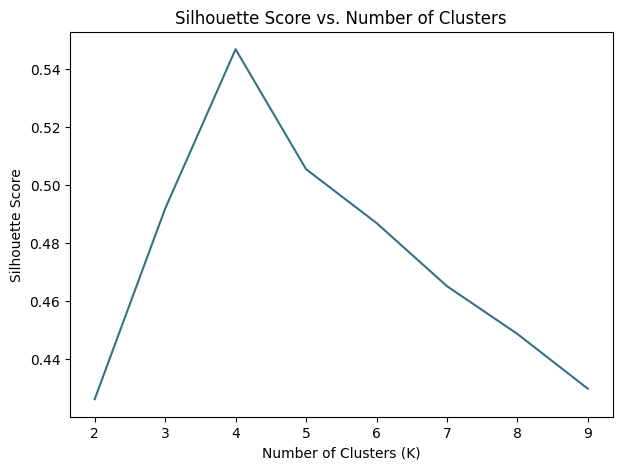

In [27]:
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 4 clusters.

In [30]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])



## Visualisation of clusters

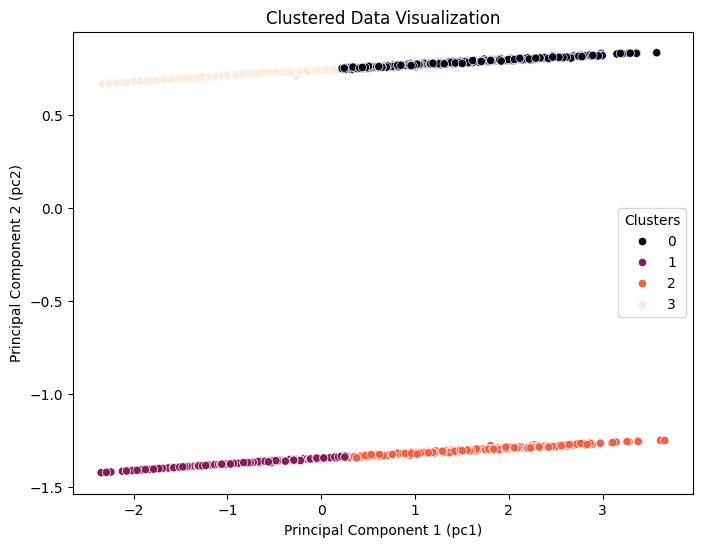

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='rocket')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [32]:
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,71846.901235,1149.742504,1.0
1,37332.339956,150.761589,0.0
2,72059.439394,1167.306061,0.0
3,37892.819883,158.463158,1.0


## Mean consumption of different product types by cluster

In [33]:
mnt_data = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1149.742504,1078.716049,624.382716,52.700176,342.162257,75.615520,54.881834,71.026455
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.463158,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585


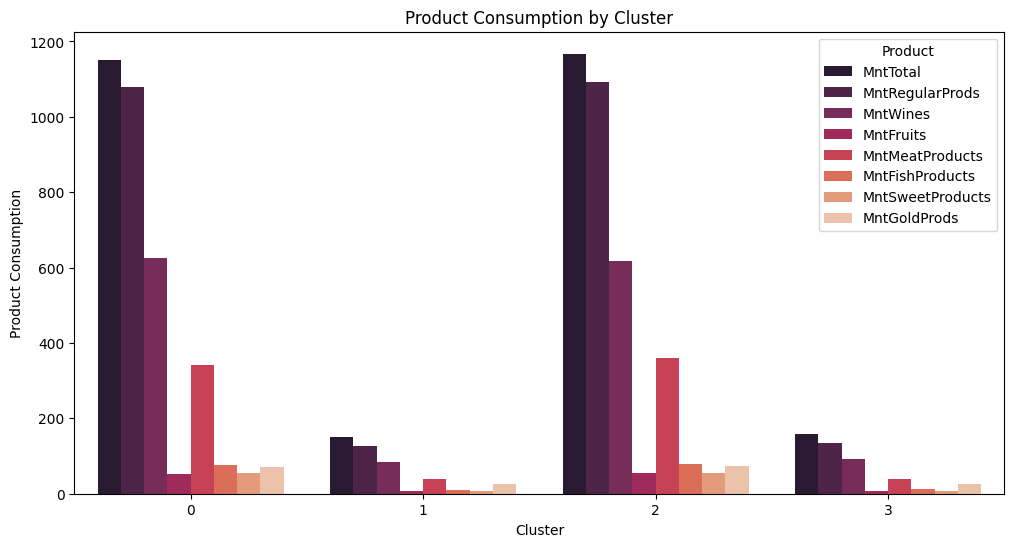

In [50]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="rocket")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

## Cluster sizes

Text(0, 0.5, 'MntTotal')

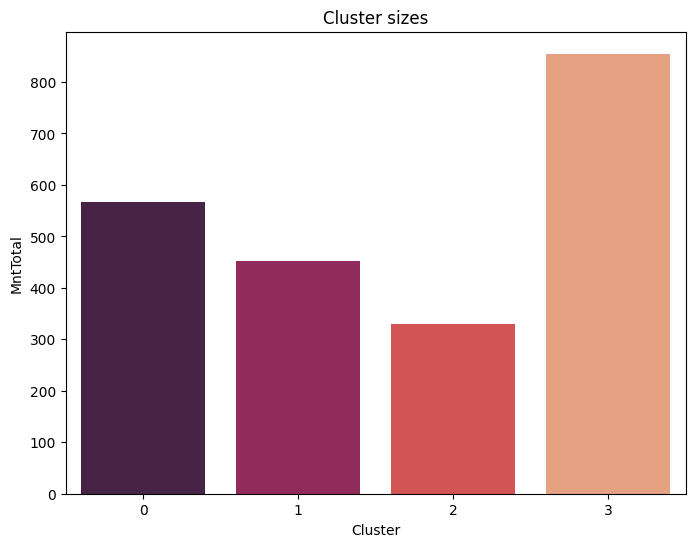

In [51]:
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'rocket')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')


In [36]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()


,Cluster,MntTotal,Share%
0,0,567,26.0
1,1,453,21.0
2,2,330,15.0
3,3,855,39.0


## Income by cluster
### Box plot

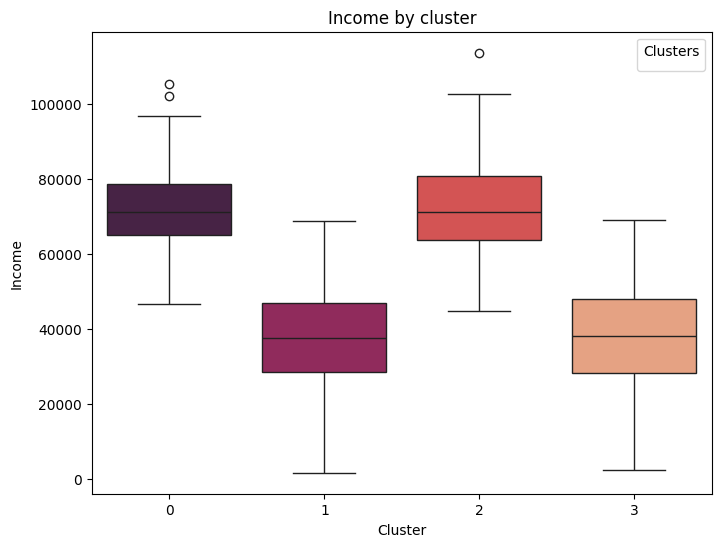

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='rocket')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

### Scatter plot

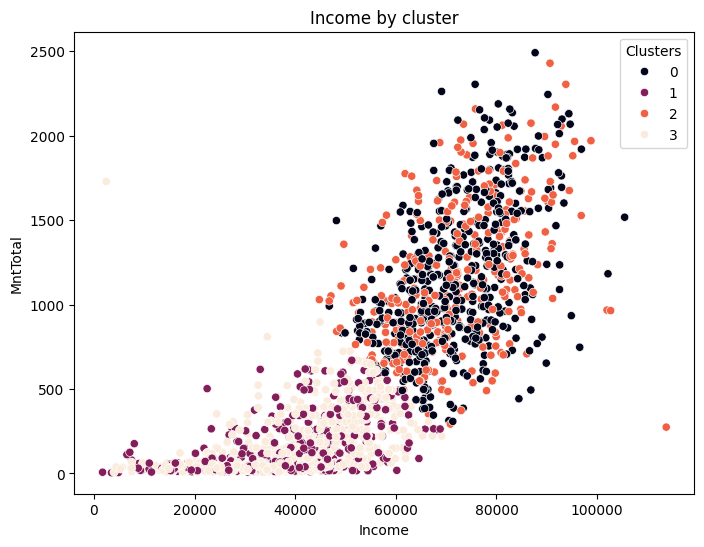

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue = 'Cluster', palette='rocket')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

## In_relationship feature by cluster

Text(0, 0.5, 'In_relationship')

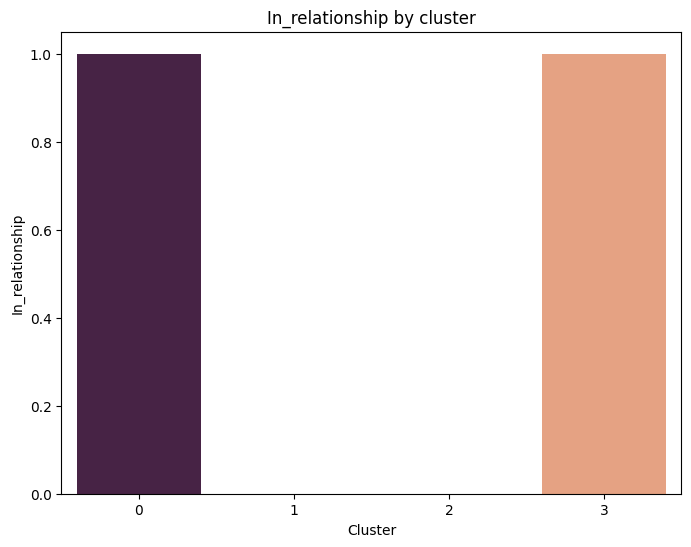

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='rocket')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

<a id="results"></a>
# Results
This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

## Optimal number of clusters = 4
The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

## Cluster Characteristics
### Cluster 0: High value customers in relationship (either married or together)
- This cluster represents 26% of the customer base
- These customers have high income and they are in a relationship

### Cluster 1: Low value single customers
- This cluster represents 21% of the customer base
- These customers have low income and they are single

### Cluster 2: High value single customers
- This cluster represents 15% of the customer base
- These customers have high income and they are single

### Cluster 3: Low value customers in relationship
- This cluster represents 39% of the customer base
- These customers have low income and they are in a relationship




<a id="recommendations"></a>
# Recommendations
Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

## Marketing Strategies for Each Cluster

### Cluster 0: High value customers in relationship (either married or together)
- Preliminary analysis showed that high income customers buy more wines and fruits. 
- A tailored campaign to promote high quality wines may bring good results. 
- This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.

### Cluster 1: Low value single customers
- Promos with discounts and coupons may bring good results for this targeted group.
- Loyalty program may stimulate these customers to purchase more often. 

### Cluster 2: High value single customers
- Similar to the Cluster 0, these customers buy a lot of wines and fruits.
- This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for single customers

### Cluster 3: Low value customers in relationship
- This cluster has the highest percentage of our customers (39%).
- Family offers and discounts may influence these customers to make more purchases

## Opportunities for the further analysis
- Further exploration on how children influence on the consumed products 
- Further analysis on the influence of education
- analysis of frequent buyers
- Analysis of sales channels, e.g. store, website, etc.
- Analysis of the response to the marketing campaigns
- It would be great to add gender data to the dataset
- Test different clustering algorithms


# Thank you!